# Model Pipeline
---

In [118]:
import pandas as pd 
from sklearn.pipeline import Pipeline as P
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

train = pd.read_csv('data/train.csv')

# Get Columns of different types 

In [119]:
int_cols = train.select_dtypes(['int', 'float']).drop(columns=['SalePrice']).columns.tolist()
object_cols  = train.select_dtypes('object').columns.tolist()

In [120]:
train[int_cols] = train[int_cols].fillna(0)
train[object_cols] = train[object_cols].fillna('NaN')

In [129]:
X,y=train.drop(columns=['SalePrice']),train['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=0, test_size=.3)

# Numerical Transforms

In [130]:
num_pipeline = P([
    ('std_scaler', StandardScaler())
])
num_p = num_pipeline.fit_transform(train[int_cols])

# Categorical Transforms

In [131]:
categorical_pipeline = P(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])
cat_p = categorical_pipeline.fit_transform(train[object_cols])

# Call Both Pipes

In [132]:
full_processor = ColumnTransformer(transformers=[
    ('number', num_pipeline, int_cols),
    ('category', categorical_pipeline, object_cols)
])
full_p = full_processor.fit_transform(X_train)

In [133]:
data_pipe = P([
    ('full_processor', full_processor),
    ('model', LinearRegression())
    ])


In [135]:
data_pipe.score(X_test,y_test)

-1.0045964394485512e+17

In [233]:
preds=pd.Series(data_pipe.predict(X_test)).reset_index(drop=True).astype('int')
preds.loc[preds < 0] = 0
preds.loc[preds > 1000000] = 100000
preds = preds.loc[preds != 0]

In [234]:
from sklearn.metrics import r2_score
r2_score(y_test, data_pipe.predict(X_test).tolist())

-1.0045964394485512e+17

<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>

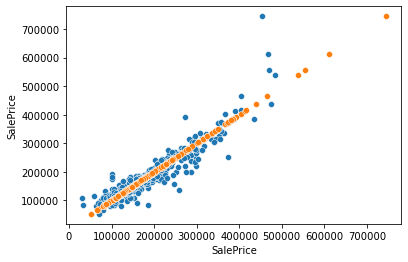

In [235]:
import seaborn as sns
sns.scatterplot(x=preds, y=y_test.reset_index(drop=True))
sns.scatterplot(x=y_test.reset_index(drop=True), y=y_test.reset_index(drop=True))

In [230]:
preds

0      250704
1      149314
2      111287
3      212133
4      100912
        ...  
433         0
434    162603
435    352804
436    207249
437    467388
Length: 438, dtype: int64